# Project Python Foundations: FoodHub Data Analysis

**Marks: 60**

### Context

The number of restaurants in New York is increasing day by day. Lots of students and busy professionals rely on those restaurants due to their hectic lifestyles. Online food delivery service is a great option for them. It provides them with good food from their favorite restaurants. A food aggregator company FoodHub offers access to multiple restaurants through a single smartphone app.

The app allows the restaurants to receive a direct online order from a customer. The app assigns a delivery person from the company to pick up the order after it is confirmed by the restaurant. The delivery person then uses the map to reach the restaurant and waits for the food package. Once the food package is handed over to the delivery person, he/she confirms the pick-up in the app and travels to the customer's location to deliver the food. The delivery person confirms the drop-off in the app after delivering the food package to the customer. The customer can rate the order in the app. The food aggregator earns money by collecting a fixed margin of the delivery order from the restaurants.

### Objective

The food aggregator company has stored the data of the different orders made by the registered customers in their online portal. They want to analyze the data to get a fair idea about the demand of different restaurants which will help them in enhancing their customer experience. Suppose you are hired as a Data Scientist in this company and the Data Science team has shared some of the key questions that need to be answered. Perform the data analysis to find answers to these questions that will help the company to improve the business.

### Data Description

The data contains the different data related to a food order. The detailed data dictionary is given below.

### Data Dictionary

* order_id: Unique ID of the order
* customer_id: ID of the customer who ordered the food
* restaurant_name: Name of the restaurant
* cuisine_type: Cuisine ordered by the customer
* cost: Cost of the order
* day_of_the_week: Indicates whether the order is placed on a weekday or weekend (The weekday is from Monday to Friday and the weekend is Saturday and Sunday)
* rating: Rating given by the customer out of 5
* food_preparation_time: Time (in minutes) taken by the restaurant to prepare the food. This is calculated by taking the difference between the timestamps of the restaurant's order confirmation and the delivery person's pick-up confirmation.
* delivery_time: Time (in minutes) taken by the delivery person to deliver the food package. This is calculated by taking the difference between the timestamps of the delivery person's pick-up confirmation and drop-off information

### Let us start by importing the required libraries

In [1]:
# import libraries for data manipulation
import numpy as np
import pandas as pd

# import libraries for data visualization
import matplotlib.pyplot as plt
import seaborn as sns

### Understanding the structure of the data

In [2]:
# uncomment and run the following lines for Google Colab
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
# read the data
df = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/foodhub_order.csv')
# returns the first 5 rows
df.head()

,order_id,customer_id,restaurant_name,cuisine_type,cost_of_the_order,day_of_the_week,rating,food_preparation_time,delivery_time
0,1477147,337525,Hangawi,Korean,30.75,Weekend,Not given,25,20
1,1477685,358141,Blue Ribbon Sushi Izakaya,Japanese,12.08,Weekend,Not given,25,23
2,1477070,66393,Cafe Habana,Mexican,12.23,Weekday,5,23,28
3,1477334,106968,Blue Ribbon Fried Chicken,American,29.20,Weekend,3,25,15
4,1478249,76942,Dirty Bird to Go,American,11.59,Weekday,4,25,24


#### Observations:

The DataFrame has 9 columns as mentioned in the Data Dictionary. Data in each row corresponds to the order placed by a customer.

### **Question 1:** How many rows and columns are present in the data? [0.5 mark]

In [5]:
# Write your code here
print(f'there is {df.shape[0]} rows in the data frame and {df.shape[1]} columns in the dataframe')


there is 1898 rows in the data frame and 9 columns in the dataframe


#### Observations:

Based on the available data it can allow us to identify patterns regarding the types of food that are more frequently ordered on specific days of the week and understand the preferences of individual customers. Moreover, we can pinpoint which food items require more time for preparation and which ones experience longer delivery times. These insights are valuable for enhancing overall efficiency in our operations.

### **Question 2:** What are the datatypes of the different columns in the dataset? (The info() function can be used) [0.5 mark]

In [4]:
# Use info() to print a concise summary of the DataFrame
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1898 entries, 0 to 1897
Data columns (total 9 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   order_id               1898 non-null   int64  
 1   customer_id            1898 non-null   int64  
 2   restaurant_name        1898 non-null   object 
 3   cuisine_type           1898 non-null   object 
 4   cost_of_the_order      1898 non-null   float64
 5   day_of_the_week        1898 non-null   object 
 6   rating                 1898 non-null   object 
 7   food_preparation_time  1898 non-null   int64  
 8   delivery_time          1898 non-null   int64  
dtypes: float64(1), int64(4), object(4)
memory usage: 133.6+ KB


#### Observations:
the data frame contains 1898 entries with non-null values in all of the columns which indicate a complete dataframe or data set, also I see that the rating is of object type which can contain non-numeric entries whcih will need further investigation.

### **Question 3:** Are there any missing values in the data? If yes, treat them using an appropriate method. [1 mark]

In [5]:
# Write your code here
df.isnull().sum()

order_id                 0
customer_id              0
restaurant_name          0
cuisine_type             0
cost_of_the_order        0
day_of_the_week          0
rating                   0
food_preparation_time    0
delivery_time            0
dtype: int64

#### Observations:
It looks like we don't have any missing entries in the dataset, but still, we need to investigate the rating column and see what we will come up with because missing entries are different than missing values. also we can drop rows or colunn if we had missng entries or values or use a method called imputation.

### **Question 4:** Check the statistical summary of the data. What is the minimum, average, and maximum time it takes for food to be prepared once an order is placed? [2 marks]

In [7]:
# Write your code here

# we can use the following code to extract the minimum, average and maximum time it takes for the food to be prepared:
min_time = df['food_preparation_time'].min()
print('the minimum time to prepare the food is', min_time)

ava_time = round(df['food_preparation_time'].mean(), 2)
print('the avarage time to prepare the food is', ava_time)

max_time = df['food_preparation_time'].max()
print('the maximum time it takes to prepare the food is', max_time)
# "Or, we can have it in one line of code, if we use this code to get a general description of the data for that specific column."
df['food_preparation_time'].describe()


the minimum time to prepare the food is 20
the avarage time to prepare the food is 27.37
the maximum time it takes to prepare the food is 35


count    1898.000000
mean       27.371970
std         4.632481
min        20.000000
25%        23.000000
50%        27.000000
75%        31.000000
max        35.000000
Name: food_preparation_time, dtype: float64

#### Observations:
It seems like 25% of the food gets ready within 23 minutes, 50% of it gets ready in 27 minutes on average, and 75% of the food gets ready within 35 minutes, which needs to be addressed to the restaurants for better efficiency.

### **Question 5:** How many orders are not rated? [1 mark]

In [13]:
from numpy.lib.arraysetops import unique
# Write the code here


# We cheeck first to see if there is any missing values in the column rating to make sure we have accurate info.
missing_ratings = df['rating'].isnull().sum()
print(f'the total number of missing rartings is:{missing_ratings}')

#print(df['rating'].isna().any())
df['rating'].value_counts(dropna=False)
not_rated = (df['rating'] == 'Not given').sum()
print(f'there is {not_rated} that are not rated.')

#testing things around

unique_cuisine = df['cuisine_type'].unique()
print(unique_cuisine)

the total number of missing rartings is:0
there is 736 that are not rated.
['Korean' 'Japanese' 'Mexican' 'American' 'Indian' 'Italian'
 'Mediterranean' 'Chinese' 'Middle Eastern' 'Thai' 'Southern' 'French'
 'Spanish' 'Vietnamese']


#### Observations:
we have 736 orders that are not rated and that should be addressed to the owners to help them reach a better serivce.

### Exploratory Data Analysis (EDA)

### Univariate Analysis

### **Question 6:** Explore all the variables and provide observations on their distributions. (Generally, histograms, boxplots, countplots, etc. are used for univariate exploration.) [9 marks]

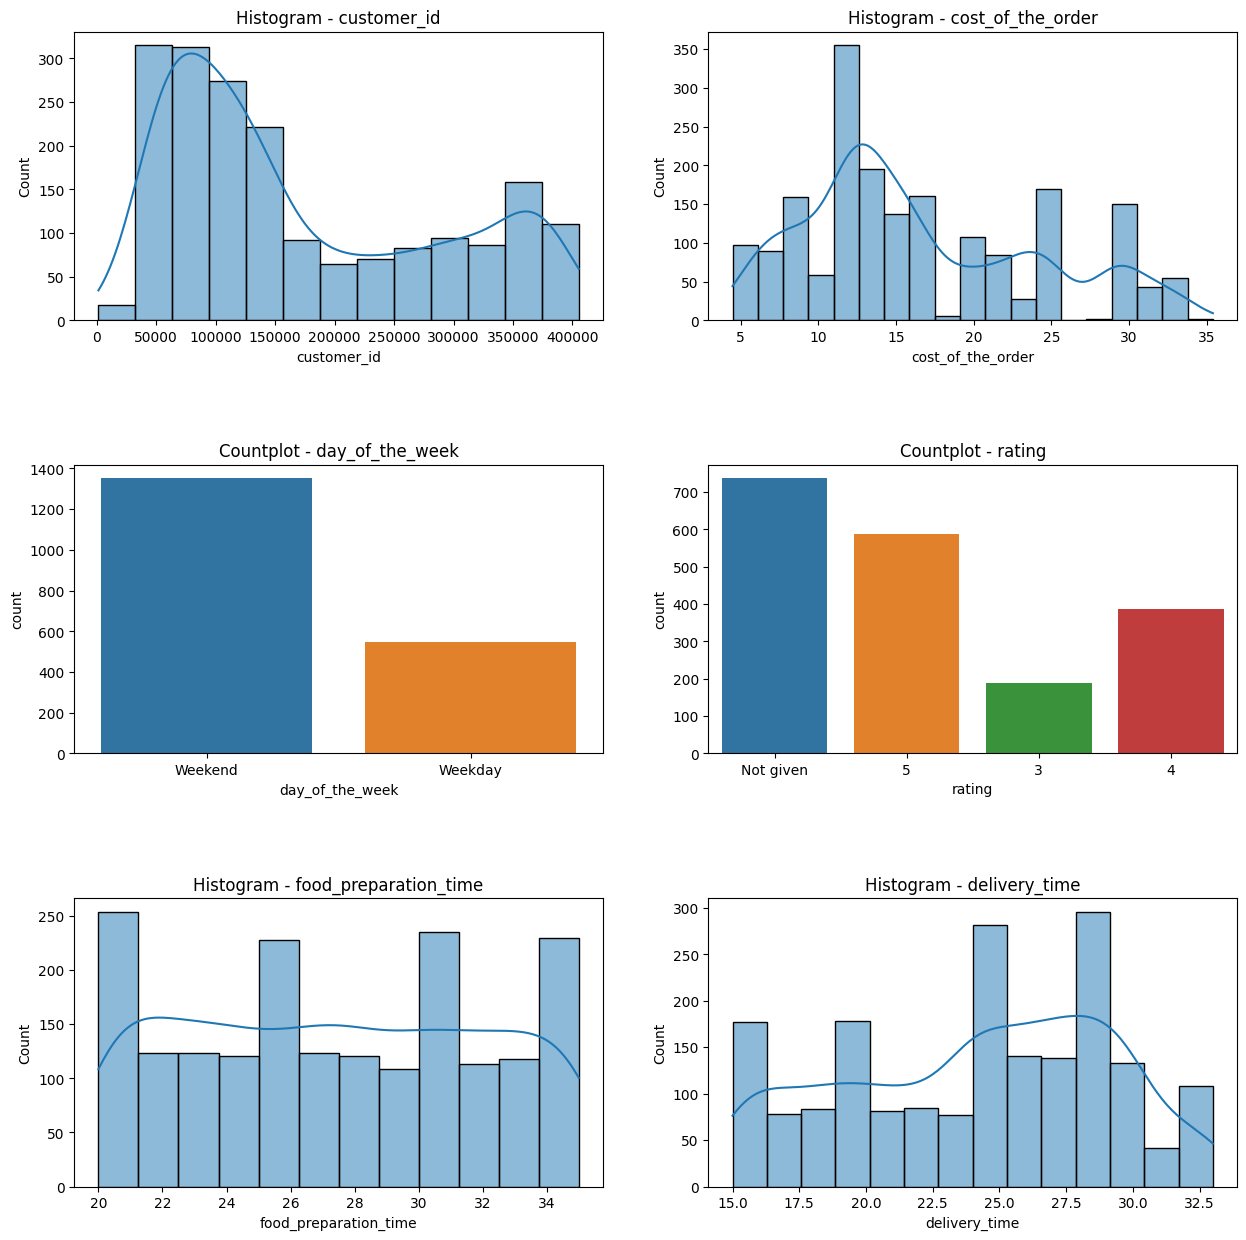

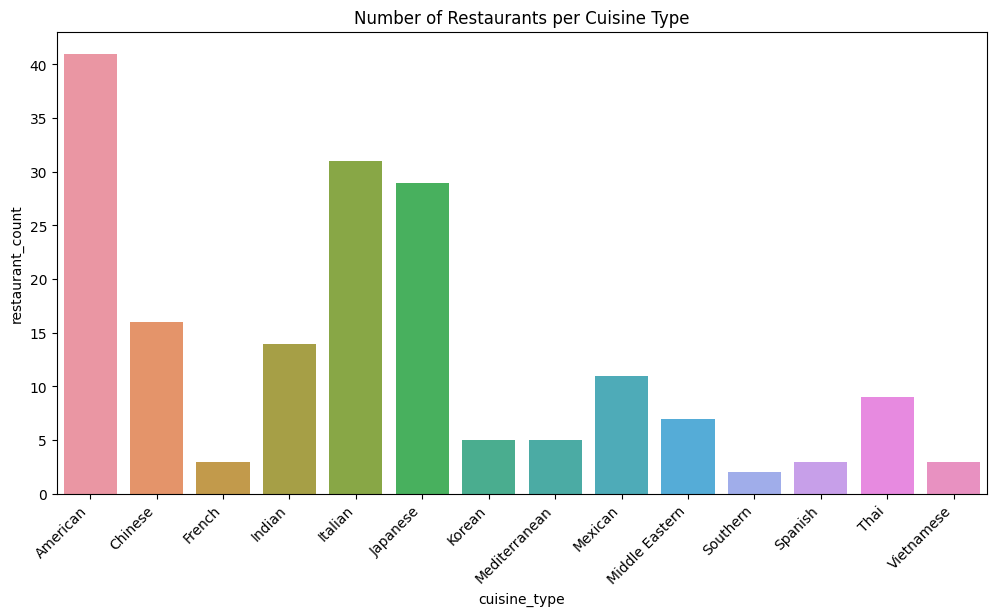

In [34]:
# Write the code here

columns_to_explore = ['customer_id', 'cost_of_the_order', 'day_of_the_week', 'rating', 'food_preparation_time', 'delivery_time']

# Set up the figure and axes for the original exploration
fig, axes = plt.subplots(nrows=3, ncols=2, figsize=(15, 15))
fig.subplots_adjust(hspace=0.5)

# Loop through each column and create visualizations for the original exploration
for i, column in enumerate(columns_to_explore):
    row = i // 2
    col = i % 2

# Histogram for numerical columns
    if df[column].dtype in ['int64', 'float64']:
        sns.histplot(df[column], ax=axes[row, col], kde=True)
        axes[row, col].set_title(f'Histogram - {column}')

# Countplot for categorical columns
    elif df[column].dtype == 'object':
        sns.countplot(x=df[column], ax=axes[row, col])
        axes[row, col].set_title(f'Countplot - {column}')

# Show the plots for the original exploration
plt.show()


'''Here, I wanted to make sense of the plots that I intended to generate.
Therefore, I dropped the 'order Id' from the plots, as we are not deeply
investigating that aspect of the data.I merged the 'cuisine'
and 'restaurant' columns into a new DataFrame, grouping the cuisines under
unique values, which represent the food types. This consolidation makes
it easier to generate data, especially considering the numerous restaurant
names that were overlapping when I was creating plots for them.'''

# Group restaurants by cuisine type and count the number of restaurants for each type
grouped_df = df.groupby('cuisine_type')['restaurant_name'].nunique().reset_index(name='restaurant_count')

# Set up the figure and axes for the additional exploration
plt.figure(figsize=(12, 6))
sns.barplot(x='cuisine_type', y='restaurant_count', data=grouped_df)
plt.title('Number of Restaurants per Cuisine Type')
plt.xticks(rotation=45, ha='right')  # Rotate x-axis labels for better readability

# Show the plot for the additional exploration
plt.show()


Observations: Restaurants are busier on the weekends, based on the days of the week plot. There are more than 700 missing ratings. Usually, customers order American food. Secondly, they order Italian food. Thirdly, they order Japanese food.

### **Question 7**: Which are the top 5 restaurants in terms of the number of orders received? [1 mark]

In [47]:
# Write the code here
topfive= df.groupby('restaurant_name')['order_id'].count().sort_values(ascending=False).head()
topfive

restaurant_name
Shake Shack                  219
The Meatball Shop            132
Blue Ribbon Sushi            119
Blue Ribbon Fried Chicken     96
Parm                          68
Name: order_id, dtype: int64

#### Observations:
shake shake have the highest orderds, and most of the restaurants are serving american food as we already noticed eariler.

### **Question 8**: Which is the most popular cuisine on weekends? [1 mark]

In [74]:
# Write the code here
df[df['day_of_the_week'] =='Weekend'].groupby('cuisine_type').count().sort_values(by='order_id', axis=0, ascending=False).head(5)

,order_id,customer_id,restaurant_name,cost_of_the_order,day_of_the_week,rating,food_preparation_time,delivery_time
cuisine_type,,,,,,,,
American,415,415,415,415,415,415,415,415
Japanese,335,335,335,335,335,335,335,335
Italian,207,207,207,207,207,207,207,207
Chinese,163,163,163,163,163,163,163,163
Mexican,53,53,53,53,53,53,53,53


#### Observations:
american food is the most popualr food in the weekend.

### **Question 9**: What percentage of the orders cost more than 20 dollars? [2 marks]

In [89]:
# Write the code here
costly_orders = df[df['cost_of_the_order']>20]
per_costly_orders = round((len(costly_orders)) / len(df) * 100,2)
print('The percentage of the orders that cost more than 20 dollars is',per_costly_orders,'%')

The percentage of the orders that cost more than 20 dollars is 29.24 %


#### Observations:
29.24% of orders cost more than 20 dollars.

### **Question 10**: What is the mean order delivery time? [1 mark]

In [93]:
# Write the code here
round(df['delivery_time'].mean(),2)

24.16

#### Observations:
the mean of order delivery time is 24.16

### **Question 11:** The company has decided to give 20% discount vouchers to the top 3 most frequent customers. Find the IDs of these customers and the number of orders they placed. [1 mark]

In [94]:
# Write the code here
df[['order_id','customer_id']].groupby('customer_id').count().sort_values(by = 'order_id',axis = 0, ascending=False).head(3)

,order_id
customer_id,
52832,13
47440,10
83287,9


#### Observations:
these are the top three customers.

### Multivariate Analysis

### **Question 12**: Perform a multivariate analysis to explore relationships between the important variables in the dataset. (It is a good idea to explore relations between numerical variables as well as relations between numerical and categorical variables) [10 marks]


<ipython-input-113-82f94bdfe385>:9: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  correlation_matrix = df.corr()


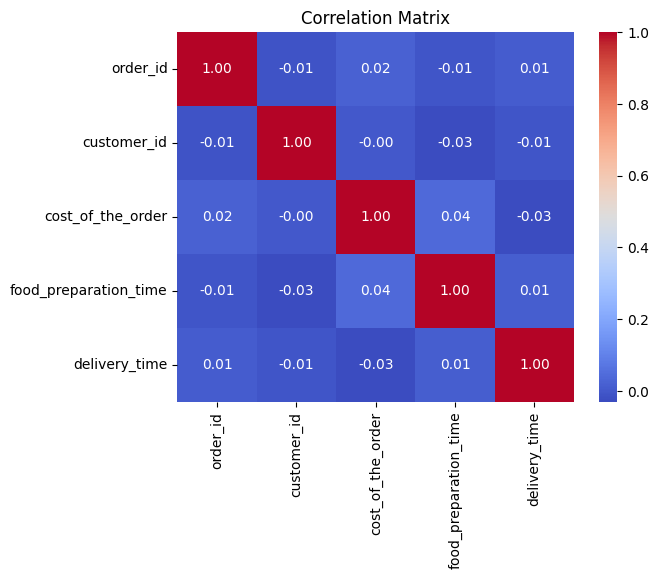

"categorical_var = df.select_dtypes(include='object').columns\nnumerical_var = df.select_dtypes(include='number').columns\n\nfor cat in categorical_var:\n    for num in numerical_var:\n        sns.boxplot(x=cat, y=num, data=df)\n        plt.title(f'Boxplot for {num} across {cat}')\n        plt.show()"

In [113]:
# Write the code here
#Pair Plot for Numerical Variables:
'''columns_names = ['order_id', 'customer_id', 'restaurant_name', 'cuisine_type','cost_of_the_order', 'day_of_the_week', 'rating','food_preparation_time', 'delivery_time']

sns.pairplot(df[columns_names])
plt.show()'''

#Correlation Matrix for Numerical Variables:
correlation_matrix = df.corr()
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Matrix')
plt.show()

#Box Plots for Categorical and Numerical Variables
'''categorical_var = df.select_dtypes(include='object').columns
numerical_var = df.select_dtypes(include='number').columns

for cat in categorical_var:
    for num in numerical_var:
        sns.boxplot(x=cat, y=num, data=df)
        plt.title(f'Boxplot for {num} across {cat}')
        plt.show()'''

the heatmap shows weak Correlation

### **Question 13:** The company wants to provide a promotional offer in the advertisement of the restaurants. The condition to get the offer is that the restaurants must have a rating count of more than 50 and the average rating should be greater than 4. Find the restaurants fulfilling the criteria to get the promotional offer. [3 marks]

In [120]:
# Write the code here
# since the in the rating column we have object data types we have to convert that first.
df['rating'] = pd.to_numeric(df['rating'], errors='coerce')

# and then we Group by 'restaurant_name' and calculate count and mean of ratings
restaurant_stats = df.groupby('restaurant_name')['rating'].agg(['count', 'mean'])

# and then we filter restaurants that meet the criteria
eligible_restaurants = restaurant_stats[(restaurant_stats['count'] > 50) & (restaurant_stats['mean'] > 4)]

# Display the eligible restaurants
print(eligible_restaurants)

                           count      mean
restaurant_name                           
Blue Ribbon Fried Chicken     64  4.328125
Blue Ribbon Sushi             73  4.219178
Shake Shack                  133  4.278195
The Meatball Shop             84  4.511905


#### Observations:
these are the restaurant that can take the offer while working fairly from our side as a company.

### **Question 14:** The company charges the restaurant 25% on the orders having cost greater than 20 dollars and 15% on the orders having cost greater than 5 dollars. Find the net revenue generated by the company across all orders. [3 marks]

In [121]:
# Write the code here
def calculate_charge(cost):
    if cost > 20:
        return 0.25 * cost
    elif cost > 5:
        return 0.15 * cost
    else:
        return 0

# Applying the function to calculate charges for each order
df['charge'] = df['cost_of_the_order'].apply(calculate_charge)

# Calculate the net revenue
net_revenue = df['cost_of_the_order'].sum() - df['charge'].sum()

print(f"Net Revenue: ${net_revenue:.2f}")

Net Revenue: $25148.52


#### Observations:
the company has generated 25148.52 in revenue.

### **Question 15:** The company wants to analyze the total time required to deliver the food. What percentage of orders take more than 60 minutes to get delivered from the time the order is placed? (The food has to be prepared and then delivered.) [2 marks]

In [124]:
# Write the code here

df['total_time'] = df['food_preparation_time'] + df['delivery_time']


percentage_more_than_60 = (df[df['total_time'] > 60].shape[0] / df.shape[0]) * 100


print(f"Percentage of orders taking more than 60 minutes: {percentage_more_than_60:.2f}%")

Percentage of orders taking more than 60 minutes: 10.54%


#### Observations:
10.54% of orders take more than 60 minutes to be deliverd.

### **Question 16:** The company wants to analyze the delivery time of the orders on weekdays and weekends. How does the mean delivery time vary during weekdays and weekends? [2 marks]

In [127]:
# Write the code here

# Create a new column to categorize weekdays and weekends
average_delivery_time = df.groupby('day_of_the_week')[['delivery_time']].agg(['mean','sum','count','std'])
average_delivery_time

delivery_time                       
                         mean    sum count       std
day_of_the_week                                     
Weekday             28.340037  15502   547  2.891428
Weekend             22.470022  30357  1351  4.628938

#### Observations:

it takes more time to deliver on the weekdays than it does in the weekend.

### Conclusion and Recommendations

### **Question 17:** What are your conclusions from the analysis? What recommendations would you like to share to help improve the business? (You can use cuisine type and feedback ratings to drive your business recommendations.) [6 marks]

### Conclusions:
* I see that the company can grow in so many different aspects by collaborating with restaurants and gaining more users through promotional offers.

There are many restaurants that are not rated.

There is weak correlation between the different variables.

Even though the dataset appears substantial, there is still a huge amount of additional data that can be collected to better understand customers, the market, and clients.






### Recommendations:

* The company can create a wide-ranging marketing plan with a more customer-focused approach. The marketing plan can be customer-based since Food Hub serves as the gateway to all the restaurants. By handling customers well, it can contribute to better business for the restaurants, ultimately benefiting Food Hub.

Food Hub can work towards enhancing the customer experience, leading to better ratings and exploring a wider variety of food options, considering that most orders are confined to a specific category.

I would recommend conducting a thorough market study to identify weak points and opportunities, taking into account the time of the week and various cultural aspects. This approach could be advantageous for the company.



---